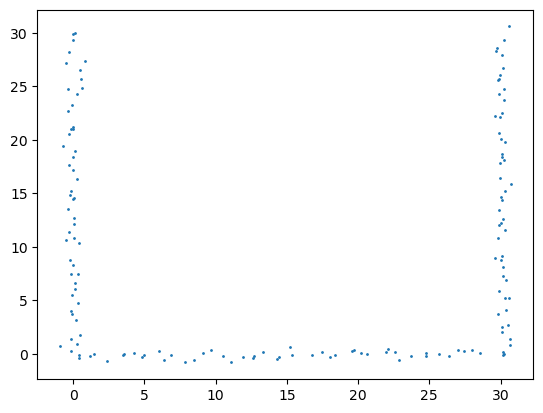

In [1]:
from scipy.stats import multivariate_normal
import numpy as np

import matplotlib.pyplot as plt
from track_linearization import make_track_graph

x = np.linspace(0, 30)

position = np.concatenate(
    (
        np.stack((np.zeros_like(x), x[::-1]), axis=1),
        np.stack((x, np.zeros_like(x)), axis=1),
        np.stack((np.ones_like(x) * 30, x), axis=1),
    )
)
position += multivariate_normal(mean=0, cov=0.1).rvs(position.shape)

node_positions = [
    (0, 0),  # xy position of node 0
    (30, 0),  # xy position of node 1
    (30, 30),  # xy position of node 2
    (0, 30),  # xy position of node 3
]

edges = [
    (0, 1),  # connects node 0 and node 1
    (0, 3),  # connects node 0 and node 3
    (1, 2),  # connects node 1 and node 2
]

track_graph = make_track_graph(node_positions, edges)

plt.scatter(position[:, 0], position[:, 1], s=1, label="observations")

/Users/edeno/Documents/GitHub/non_local_detector/src/non_local_detector/likelihoods/clusterless_kde.py:54: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


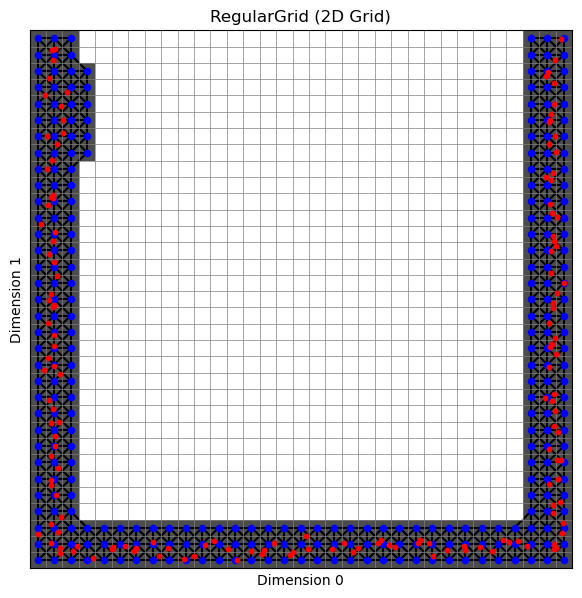

In [2]:
from non_local_detector.environment.layout_engine import RegularGridLayout


layout = RegularGridLayout()
layout.build(
    bin_size=1, data_samples=position, dilate=True, fill_holes=True, close_gaps=False
)
layout.plot()
plt.scatter(position[:, 0], position[:, 1], color="red", zorder=10, s=10)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70])

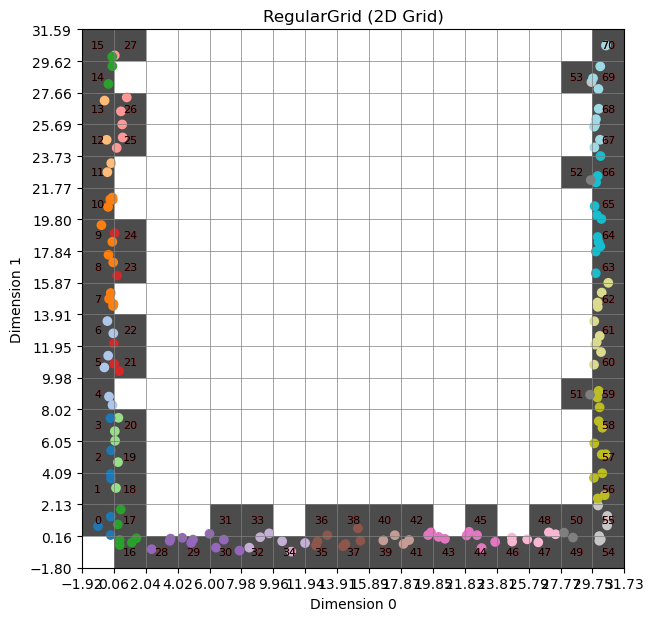

In [3]:
layout = RegularGridLayout()
layout.build(
    bin_size=2,
    data_samples=position,
    dilate=False,
    fill_holes=True,
    close_gaps=False,
    bin_count_threshold=0,
)

layout.plot(draw_connectivity_graph=False)


bin_index = layout.point_to_bin_index(layout.bin_centers_)
for i, ind in enumerate(bin_index):
    plt.text(
        layout.bin_centers_[i, 0],
        layout.bin_centers_[i, 1],
        str(ind),
        fontsize=8,
        ha="center",
        va="center",
        color="red",
    )
for i, center in enumerate(layout.bin_centers_):
    plt.text(
        center[0],
        center[1],
        str(i),
        fontsize=8,
        ha="center",
        va="center",
    )
bin_ind = layout.point_to_bin_index(position)
plt.scatter(position[:, 0], position[:, 1], c=bin_ind, cmap="tab20")
bin_index

<Axes: title={'center': 'RegularGrid (2D Grid)'}, xlabel='Dimension 0', ylabel='Dimension 1'>

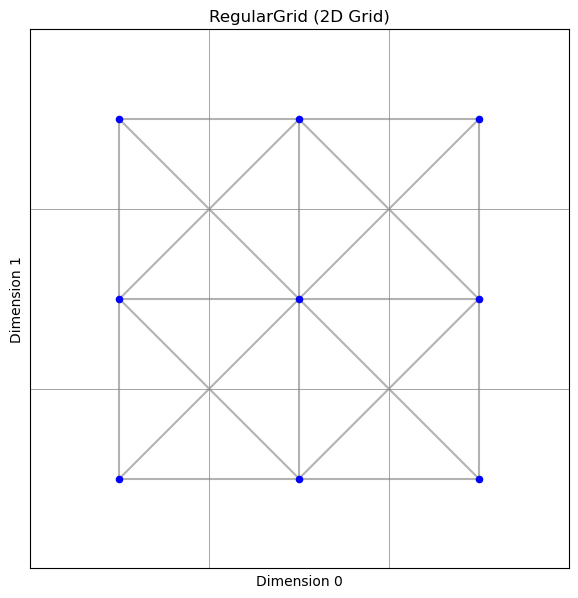

In [4]:
layout = RegularGridLayout()
layout.build(bin_size=10, dimension_ranges=((0, 30), (0, 30)))
layout.plot()

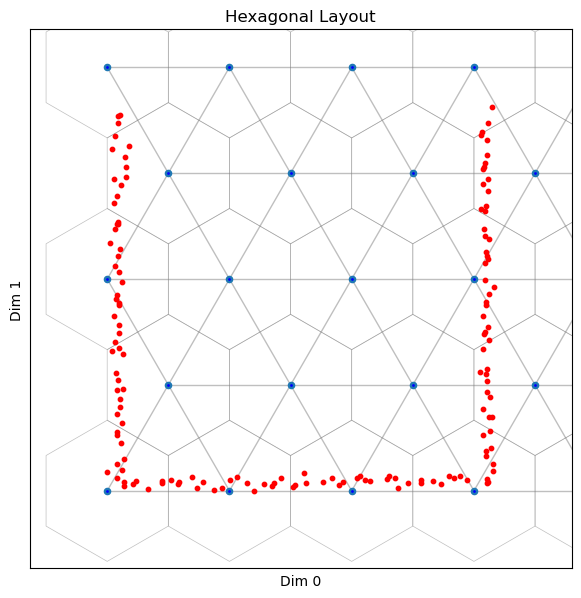

In [5]:
from non_local_detector.environment.layout_engine import HexagonalLayout

layout = HexagonalLayout()
layout.build(
    hexagon_width=10,
    data_samples=position,
    bin_count_threshold=0,
    infer_active_bins=False,
)
layout.plot()
plt.scatter(position[:, 0], position[:, 1], color="red", zorder=10, s=10)

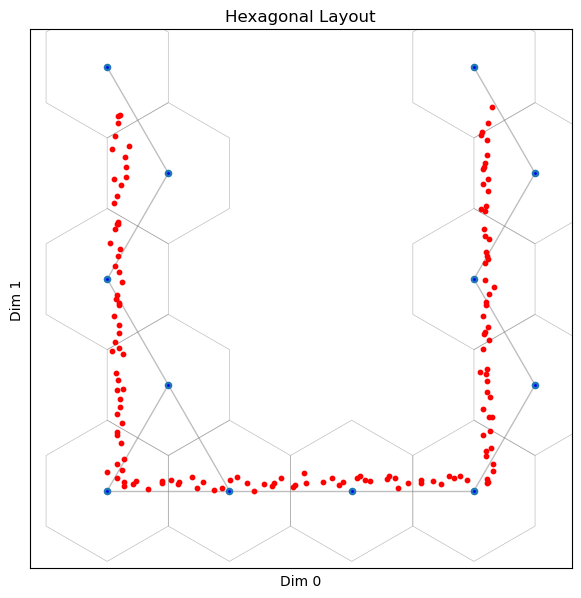

In [6]:
from non_local_detector.environment.layout_engine import HexagonalLayout

layout = HexagonalLayout()
layout.build(
    hexagon_width=10,
    data_samples=position,
    bin_count_threshold=0,
    infer_active_bins=True,
)
layout.plot()
plt.scatter(position[:, 0], position[:, 1], color="red", zorder=10, s=10)

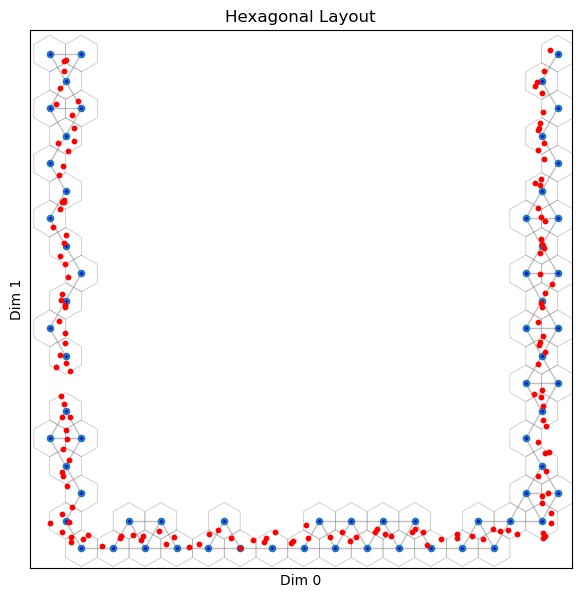

In [7]:
layout = HexagonalLayout()
layout.build(
    hexagon_width=2,
    data_samples=position,
    bin_count_threshold=0,
    infer_active_bins=True,
)
layout.plot()
plt.scatter(position[:, 0], position[:, 1], color="red", zorder=10, s=10)

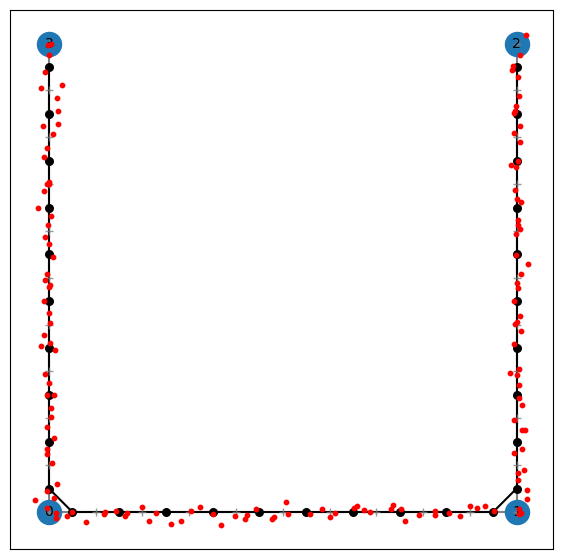

In [8]:
from non_local_detector.environment.layout_engine import GraphLayout

layout = GraphLayout()
layout.build(
    graph_definition=track_graph,
    edge_order=edges,
    edge_spacing=10.0,
    bin_size=3,
)
layout.plot()
plt.scatter(position[:, 0], position[:, 1], color="red", zorder=10, s=10)

<Axes: title={'center': 'Graph Layout'}, xlabel='Linearized Position', ylabel='Bin Index'>

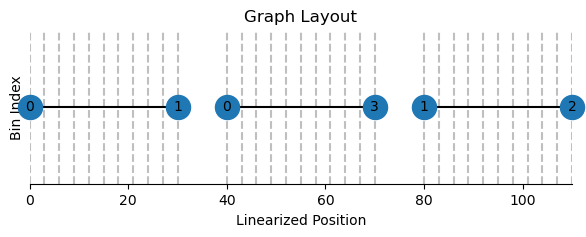

In [9]:
layout.plot_linear_layout()